## Build and evaluate model

In [15]:
import pandas as pd

df = pd.read_csv('../datasets/spam_email.csv')
print(df.shape)
df.head()

(6000, 10)


,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,3,0,191,32.0,3,3.0,0,11,1.0,1.0
1,3,9,45,1.0,2,1.0,2,8,2.0,1.0
2,3,9,52,1.0,4,0.0,2,10,1.0,1.0
3,2,3,75,6.0,0,2.0,0,8,2.0,0.0
4,3,5,299,279.0,0,2.0,0,6,1.0,1.0


In [10]:
#If you have unnecessary columns (say ID) use df.drop('ID', axis=1)

# Check for rows with null values
null_values = df[df.isnull().any(axis=1)]
print("Null rows are ", null_values.index)
print("Shape before removing null rows", df.shape)

# Drop all rows with null values
df_cleaned = df.dropna()
print("Shape after removing null rows",df_cleaned.shape)

Null rows are  Index([52, 91, 130, 136], dtype='int64')
Shape before removing null rows (6000, 10)
Shape after removing null rows (5996, 10)


In [19]:
X=df_cleaned.iloc[:, :-1].values
y=df_cleaned.iloc[:, -1].values

print(X.shape, type(X))
print(y.shape, type(y))

(5996, 9) <class 'numpy.ndarray'>
(5996,) <class 'numpy.ndarray'>


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.preprocessing import StandardScaler

# Feature scaling or normalisation
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [32]:
#Predictions

pred = model.predict(X_test)

print(y_test.shape)
print(pred.shape)
print(y_test[34], pred[34])

(1200,)
(1200,)
1.0 1.0


## Calculate metrics from sklearn

### Accuracy, Precision, Recall, F1

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("MCC Score:", matthews_corrcoef(y_test, pred))

Accuracy: 0.9075
Precision: 0.9158415841584159
Recall: 0.9024390243902439
F1 Score: 0.9090909090909092
MCC Score: 0.8150454820783007


### Confusion Matrix

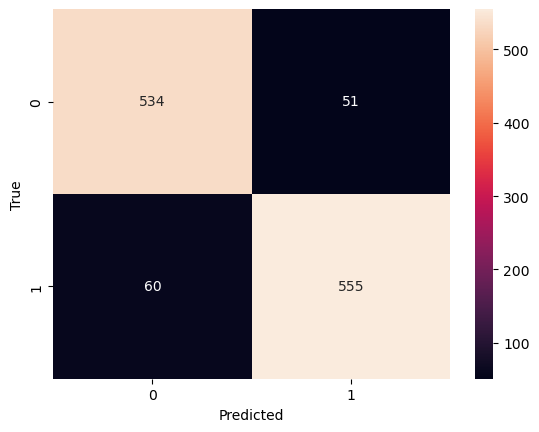

True Positives: 555
True Negatives: 534
False Positives: 51
False Negatives: 60
Total: 1200


In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
total = y_test.shape[0]
print("Total:",total)

## Calculate Metrics manually

In [69]:
import math

accuracy = (TP+TN)/total
precision=(TP)/(TP+FP)
recall=(TP)/(TP+FN)
f1=(2*precision*recall)/(precision+recall)
mcc=((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))
spec=(TN)/(TN+FP)
npv=(TN)/(TN+FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC Score:", mcc)
print("Specificity:", spec)
print("Negative Predictive Rate", npv)

Accuracy: 0.9075
Precision: 0.9158415841584159
Recall: 0.9024390243902439
F1 Score: 0.9090909090909092
MCC Score: 0.8150454820783007
Specificity: 0.9128205128205128
Negative Predictive Rate 0.898989898989899


## Plot ROC Curves

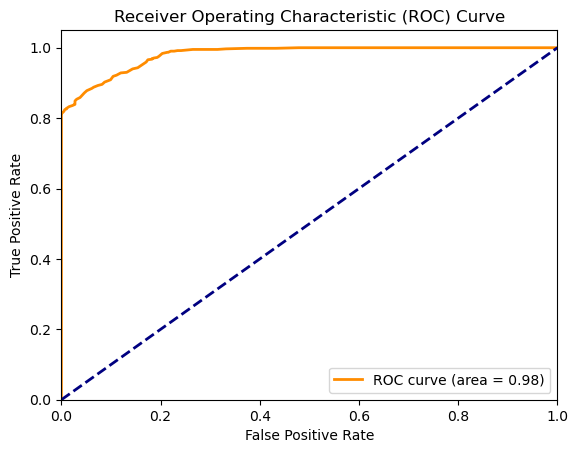

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming clf is your classifier and X_test, y_test are your test data
# Assuming you've already trained your classifier and obtained predicted probabilities
y_score = model.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()